<H1> <b> NLP language models (Classification & Regression tasks)

# OBJECTIF OF THIS LAB: 

The main purpose behind this lab is to get familiar with NLP language models using Sklearn library. this lab contain two parts, first use language model in regression mode and the second part is about a classification task using weak algorithms. 

## Part 1: Language Modeling / Regression: 

Natural Language Processing (NLP) involves the interaction between computers and human language, enabling machines to understand, interpret, and generate text. Language models, a crucial component of NLP, predict the probability of word sequences. Language model regression specifically predicts continuous outcomes from textual data, aiding tasks like forecasting stock prices or estimating sentiment scores. This technique finds applications across finance, healthcare, and marketing, enhancing decision-making by linking language properties with numerical predictions.

<h3>#Used DATA:

The Short Answer Grading dataset from the University of North Texas includes ten assignments, each with four to seven questions, and two exams with ten questions each. These were part of an introductory computer science course, with student answers collected through an online platform. The dataset comprises 80 questions and 2273 student responses, graded by two human judges on a scale from 0 (completely incorrect) to 5 (perfect answer). The average score from the two judges is used as the gold standard for evaluating automatic scoring systems.<br/>
**DATASET**: https://github.com/dbbrandt/short_answer_granding_capstone_project/blob/master/data/sag/answers.csv


#### #Upload dataset:

<h5> _features: id, answer & correct <br>_target: score </h5>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv("answers.csv")
df

,id,answer,score,correct
0,1.1,High risk problems are address in the prototyp...,3.5,0.0
1,1.1,To simulate portions of the desired final prod...,5.0,1.0
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0
4,1.1,It is used to let the users have a first idea ...,3.0,0.0
...,...,...,...,...
2437,12.1,log n,5.0,1.0
2438,12.1,minus 1 divided by 2,1.5,0.0
2439,12.1,2n-1,2.5,0.0
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0


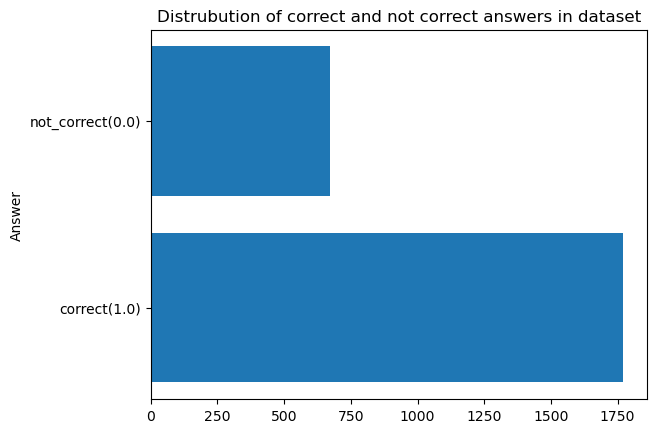

In [3]:
#Count the number of each type of answers (correct or not):
correct=list(df['correct']).count(1.0)
not_correct=list(df['correct']).count(0.0)
C=['correct(1.0)','not_correct(0.0)']
NC=[correct,not_correct]
plt.barh(C,NC)
plt.ylabel('Answer')
plt.title('Distrubution of correct and not correct answers in dataset')
plt.show()

<b> Interpretation: imbalanced class distribution.

#### #NLP processing pipeline:

In [4]:
import nltk
from nltk import word_tokenize

In [5]:
#TOKENIZATION/
#testing:
print(word_tokenize(df['answer'][0]))

['High', 'risk', 'problems', 'are', 'address', 'in', 'the', 'prototype', 'program', 'to', 'make', 'sure', 'that', 'the', 'program', 'is', 'feasible', '.', 'A', 'prototype', 'may', 'also', 'be', 'used', 'to', 'show', 'a', 'company', 'that', 'the', 'software', 'can', 'be', 'possibly', 'programmed', '.']


In [6]:
lst=[word_tokenize(df['answer'][i]) for i in range(len(df))]
df.insert(4,"tokenized_sentence",lst)

In [7]:
df

,id,answer,score,correct,tokenized_sentence
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,"[High, risk, problems, are, address, in, the, ..."
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,"[To, simulate, portions, of, the, desired, fin..."
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,"[A, prototype, program, simulates, the, behavi..."
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,"[Defined, in, the, Specification, phase, a, pr..."
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,"[It, is, used, to, let, the, users, have, a, f..."
...,...,...,...,...,...
2437,12.1,log n,5.0,1.0,"[log, n]"
2438,12.1,minus 1 divided by 2,1.5,0.0,"[minus, 1, divided, by, 2]"
2439,12.1,2n-1,2.5,0.0,[2n-1]
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0,"[it, takes, at, most, h, steps, ,, where, h, i..."


In [8]:
from nltk.stem import WordNetLemmatizer

In [9]:
#LEMMATIZATION/
lemm = WordNetLemmatizer()
#testing:
print(lemm.lemmatize(word_tokenize(df['answer'][0])[0]))

High


In [10]:
lemmat_wrd=[[lemm.lemmatize(wrd.lower()) for wrd in token] for token in df['tokenized_sentence']]
df.insert(5,'lemmatized_words',lemmat_wrd)
df

,id,answer,score,correct,tokenized_sentence,lemmatized_words
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,"[High, risk, problems, are, address, in, the, ...","[high, risk, problem, are, address, in, the, p..."
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,"[To, simulate, portions, of, the, desired, fin...","[to, simulate, portion, of, the, desired, fina..."
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,"[A, prototype, program, simulates, the, behavi...","[a, prototype, program, simulates, the, behavi..."
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,"[Defined, in, the, Specification, phase, a, pr...","[defined, in, the, specification, phase, a, pr..."
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,"[It, is, used, to, let, the, users, have, a, f...","[it, is, used, to, let, the, user, have, a, fi..."
...,...,...,...,...,...,...
2437,12.1,log n,5.0,1.0,"[log, n]","[log, n]"
2438,12.1,minus 1 divided by 2,1.5,0.0,"[minus, 1, divided, by, 2]","[minus, 1, divided, by, 2]"
2439,12.1,2n-1,2.5,0.0,[2n-1],[2n-1]
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0,"[it, takes, at, most, h, steps, ,, where, h, i...","[it, take, at, most, h, step, ,, where, h, is,..."


In [11]:
#STOPEWORDS/
from nltk.corpus import stopwords
stpwrds = set(stopwords.words('english'))
print(stpwrds)

{'other', "you'll", 'isn', 'whom', 'of', 'in', 'them', 'by', 'against', 'where', "isn't", 'ma', 'yourselves', 'at', 'hadn', 'doesn', 'just', "doesn't", 'until', 'has', 'what', 'had', 'be', 'doing', 'does', 're', 'shan', 'because', 'ourselves', 'd', 'can', 'on', 'are', 'below', "weren't", 'their', "she's", 'only', 'again', 'haven', 'these', 'few', 'but', 'a', 'was', 'over', 'will', "hadn't", 'all', 'to', 'for', 'up', 'have', 'an', 'hasn', 'once', 'yourself', 'your', 'shouldn', 'too', 'o', 'll', 'mustn', 'itself', 'than', 'herself', 'which', "that'll", 'or', 'under', 'did', "you'd", 'with', 't', 'couldn', 'now', 'he', 'why', 'and', "you've", 'my', 'so', 'same', "should've", 'between', 'about', 'those', 'both', "mightn't", 'm', 'wouldn', 'more', 'if', 'myself', 'here', 'wasn', 'its', 'that', 'i', "shouldn't", 'her', "needn't", 'from', 'is', 'out', 'we', 'then', 'down', 'should', 'me', 'needn', 'there', 'before', 'won', 'the', "shan't", "didn't", 'theirs', 'each', 'don', 's', 'our', "haven

In [12]:
rem_stpwrd=[]
for tkn in df['lemmatized_words']:
    rem__=[]
    for wrd in tkn:
        if wrd not in stpwrds:
            rem__.append(wrd)
    rem_stpwrd.append(rem__)
    
df.insert(6,"removed_stpwrds",rem_stpwrd)

In [13]:
df

,id,answer,score,correct,tokenized_sentence,lemmatized_words,removed_stpwrds
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,"[High, risk, problems, are, address, in, the, ...","[high, risk, problem, are, address, in, the, p...","[high, risk, problem, address, prototype, prog..."
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,"[To, simulate, portions, of, the, desired, fin...","[to, simulate, portion, of, the, desired, fina...","[simulate, portion, desired, final, product, q..."
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,"[A, prototype, program, simulates, the, behavi...","[a, prototype, program, simulates, the, behavi...","[prototype, program, simulates, behavior, port..."
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,"[Defined, in, the, Specification, phase, a, pr...","[defined, in, the, specification, phase, a, pr...","[defined, specification, phase, prototype, sti..."
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,"[It, is, used, to, let, the, users, have, a, f...","[it, is, used, to, let, the, user, have, a, fi...","[used, let, user, first, idea, completed, prog..."
...,...,...,...,...,...,...,...
2437,12.1,log n,5.0,1.0,"[log, n]","[log, n]","[log, n]"
2438,12.1,minus 1 divided by 2,1.5,0.0,"[minus, 1, divided, by, 2]","[minus, 1, divided, by, 2]","[minus, 1, divided, 2]"
2439,12.1,2n-1,2.5,0.0,[2n-1],[2n-1],[2n-1]
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0,"[it, takes, at, most, h, steps, ,, where, h, i...","[it, take, at, most, h, step, ,, where, h, is,...","[take, h, step, ,, h, height, tree, .]"


#### #Word2vect, Bag of words & TD-IDF:

In [14]:
import gensim
from gensim.models import Word2Vec
import multiprocessing

In [15]:
#number of cores in my laptop
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

8

In [16]:
%%time
#setup the model's parametres 
model_1 = Word2Vec(sentences=list(df["removed_stpwrds"]),vector_size=100,window=10,min_count=1, workers=cores-2)
model_1

CPU times: total: 31.2 ms
Wall time: 160 ms


In [17]:
#Function to vectorize words:
def vectorize_words(list_of_words,model):
    word_vect=[model.wv[wrd] for wrd in list_of_words if wrd in model.wv]
    if word_vect:
        return np.mean(word_vect,axis=0)
    else:
        return np.zeros(model.vector_size)

In [18]:
%%time
#CBOW model using gensim
word_to_vectors=[vectorize_words(rmsw,model_1) for rmsw in df['removed_stpwrds']]
df.insert(7,"words_to_vectors",word_to_vectors)

CPU times: total: 46.9 ms
Wall time: 108 ms


In [19]:
df

,id,answer,score,correct,tokenized_sentence,lemmatized_words,removed_stpwrds,words_to_vectors
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,"[High, risk, problems, are, address, in, the, ...","[high, risk, problem, are, address, in, the, p...","[high, risk, problem, address, prototype, prog...","[0.1232722, 0.47884718, 0.19396257, -0.0860358..."
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,"[To, simulate, portions, of, the, desired, fin...","[to, simulate, portion, of, the, desired, fina...","[simulate, portion, desired, final, product, q...","[0.10894572, 0.42802095, 0.17216878, -0.073641..."
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,"[A, prototype, program, simulates, the, behavi...","[a, prototype, program, simulates, the, behavi...","[prototype, program, simulates, behavior, port...","[0.106467776, 0.42335248, 0.17055649, -0.07452..."
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,"[Defined, in, the, Specification, phase, a, pr...","[defined, in, the, specification, phase, a, pr...","[defined, specification, phase, prototype, sti...","[0.10686138, 0.41665316, 0.16781402, -0.074633..."
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,"[It, is, used, to, let, the, users, have, a, f...","[it, is, used, to, let, the, user, have, a, fi...","[used, let, user, first, idea, completed, prog...","[0.09231737, 0.36997554, 0.15114282, -0.062202..."
...,...,...,...,...,...,...,...,...
2437,12.1,log n,5.0,1.0,"[log, n]","[log, n]","[log, n]","[0.01944544, 0.39632884, 0.16333231, 0.0083771..."
2438,12.1,minus 1 divided by 2,1.5,0.0,"[minus, 1, divided, by, 2]","[minus, 1, divided, by, 2]","[minus, 1, divided, 2]","[0.059205264, 0.40877384, 0.16030608, -0.03414..."
2439,12.1,2n-1,2.5,0.0,[2n-1],[2n-1],[2n-1],"[0.0020851134, 0.0058251917, -0.0025395774, -0..."
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0,"[it, takes, at, most, h, steps, ,, where, h, i...","[it, take, at, most, h, step, ,, where, h, is,...","[take, h, step, ,, h, height, tree, .]","[0.14925082, 0.60180736, 0.23604994, -0.098040..."


In [20]:
df["words_to_vectors"][2000]

array([ 0.14252236,  0.5479362 ,  0.2051224 , -0.08602925, -0.1543955 ,
       -0.35511297,  0.36469507,  0.78633314, -0.22426893, -0.31636062,
        0.15168291, -0.06952063, -0.07809457,  0.23655583, -0.14504825,
       -0.03354326,  0.35987225, -0.30089512, -0.3288794 , -0.57736284,
       -0.08987885, -0.28153542, -0.13750921, -0.59959835,  0.18053542,
       -0.18546909, -0.70459634, -0.21170793, -0.09044681,  0.17929338,
        0.3583457 , -0.00316898,  0.11386155, -0.5521322 , -0.12687787,
       -0.0563955 , -0.13291274, -0.5158514 , -0.13112207, -0.68879604,
       -0.5515131 , -0.2746022 , -0.31645018,  0.0738935 ,  0.6050606 ,
       -0.3265009 ,  0.00522676,  0.11262488,  0.1796656 ,  0.65438956,
        0.27957898,  0.02286005, -0.07552584,  0.21521302, -0.38137397,
        0.31576568,  0.05328649, -0.08707479, -0.6030729 ,  0.35400772,
        0.0697433 ,  0.1438519 , -0.07201108,  0.07203252, -0.6548929 ,
        0.13388962,  0.67318374,  0.12463959, -0.41787493,  0.11

In [21]:
%%time
#TF-IDF:
from sklearn.feature_extraction.text import TfidfVectorizer
docs=df['answer']
model_2 = TfidfVectorizer()
result_vects= model_2.fit_transform(docs)
df.insert(8,"TF-IDF_vects",list(result_vects.toarray()))

CPU times: total: 15.6 ms
Wall time: 81 ms


In [22]:
df

,id,answer,score,correct,tokenized_sentence,lemmatized_words,removed_stpwrds,words_to_vectors,TF-IDF_vects
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,"[High, risk, problems, are, address, in, the, ...","[high, risk, problem, are, address, in, the, p...","[high, risk, problem, address, prototype, prog...","[0.1232722, 0.47884718, 0.19396257, -0.0860358...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,"[To, simulate, portions, of, the, desired, fin...","[to, simulate, portion, of, the, desired, fina...","[simulate, portion, desired, final, product, q...","[0.10894572, 0.42802095, 0.17216878, -0.073641...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,"[A, prototype, program, simulates, the, behavi...","[a, prototype, program, simulates, the, behavi...","[prototype, program, simulates, behavior, port...","[0.106467776, 0.42335248, 0.17055649, -0.07452...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,"[Defined, in, the, Specification, phase, a, pr...","[defined, in, the, specification, phase, a, pr...","[defined, specification, phase, prototype, sti...","[0.10686138, 0.41665316, 0.16781402, -0.074633...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,"[It, is, used, to, let, the, users, have, a, f...","[it, is, used, to, let, the, user, have, a, fi...","[used, let, user, first, idea, completed, prog...","[0.09231737, 0.36997554, 0.15114282, -0.062202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
2437,12.1,log n,5.0,1.0,"[log, n]","[log, n]","[log, n]","[0.01944544, 0.39632884, 0.16333231, 0.0083771...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2438,12.1,minus 1 divided by 2,1.5,0.0,"[minus, 1, divided, by, 2]","[minus, 1, divided, by, 2]","[minus, 1, divided, 2]","[0.059205264, 0.40877384, 0.16030608, -0.03414...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2439,12.1,2n-1,2.5,0.0,[2n-1],[2n-1],[2n-1],"[0.0020851134, 0.0058251917, -0.0025395774, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0,"[it, takes, at, most, h, steps, ,, where, h, i...","[it, take, at, most, h, step, ,, where, h, is,...","[take, h, step, ,, h, height, tree, .]","[0.14925082, 0.60180736, 0.23604994, -0.098040...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


#### #ML models:

In this part we will applicate the machine learning model in the cleaned data to predict the score obtained in each answer.(we using the Words_to_vectors in rest of this lab's part)

In [23]:
X=np.array([np.append(row['id'],row['words_to_vectors']) for _,row in df.iterrows()])
y=df['score'].values

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=741474,test_size=0.25)

##### #Support Vector Machine (SVM-R):

In [25]:
from sklearn.svm import SVR
model_svr=SVR()
#train model:
model_svr.fit(X_train,y_train)

SVR()

In [26]:
#model predictions:
predictions_svr=model_svr.predict(X_test)

In [27]:
#Metrics and scoring: quantifying the quality of predictions
import math as mt
from sklearn.metrics import mean_squared_error,r2_score
#mean squared error:
mse_svm=mean_squared_error(y_test,predictions_svr)
rmse_svm=mt.sqrt(mse_svm)
r2_svm=r2_score(y_test,predictions_svr)

##### #Linrear Regression:

In [28]:
from sklearn.linear_model import LinearRegression
model_LinR= LinearRegression()
#train model:
model_LinR.fit(X_train,y_train)

LinearRegression()

In [29]:
#model predictions:
predictions_LinR=model_LinR.predict(X_test)

In [30]:
#Metrics and scoring: quantifying the quality of predictions
#mean squared error:
mse_LinR=mean_squared_error(y_test,predictions_LinR)
#root mean squared error
rmse_LinR=mt.sqrt(mse_LinR)
#R² score
r2_LinR=r2_score(y_test,predictions_LinR)

##### #Decision Tree:

In [31]:
from sklearn.tree import DecisionTreeRegressor
model_DT=DecisionTreeRegressor()
#train model:
model_DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [32]:
#model predictions:
predictions_DT=model_DT.predict(X_test)

In [33]:
#Metrics and scoring: quantifying the quality of predictions
#mean squared error:
mse_DT=mean_squared_error(y_test,predictions_DT)
#root mean squared error
rmse_DT=mt.sqrt(mse_DT)
#R² score
r2_DT=r2_score(y_test,predictions_DT)

##### #Extra Tree Regressor:

In [34]:
from sklearn.tree import ExtraTreeRegressor
model_XDT= ExtraTreeRegressor()
#train model:
model_XDT.fit(X_train,y_train)

ExtraTreeRegressor()

In [35]:
#model predictions:
predictions_XDT=model_XDT.predict(X_test)

In [36]:
#Metrics and scoring: quantifying the quality of predictions
#mean squared error:
mse_XDT=mean_squared_error(y_test,predictions_XDT)
#root mean squared error
rmse_XDT=mt.sqrt(mse_XDT)
#R² score
r2_XDT=r2_score(y_test,predictions_XDT)

##### #Random Forest:

In [37]:
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor(n_estimators=500)
#train model;
model_RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [38]:
predictions_RF=model_RF.predict(X_test)

In [39]:
#Metrics and scoring: quantifying the quality of predictions
#mean squared error:
mse_RF=mean_squared_error(y_test,predictions_RF)
#root mean squared error
rmse_RF=mt.sqrt(mse_RF)
#R² score
r2_RF=r2_score(y_test,predictions_RF)

##### #Gradient Boosting:

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB= GradientBoostingRegressor()
model_GB.fit(X_train,y_train)

GradientBoostingRegressor()

In [41]:
predictions_GB=model_GB.predict(X_test)

In [42]:
#Metrics and scoring: quantifying the quality of predictions
#mean squared error:
mse_GB=mean_squared_error(y_test,predictions_GB)
#root mean squared error
rmse_GB=mt.sqrt(mse_GB)
#R² score
r2_GB=r2_score(y_test,predictions_GB)

#### #Plot metrics:

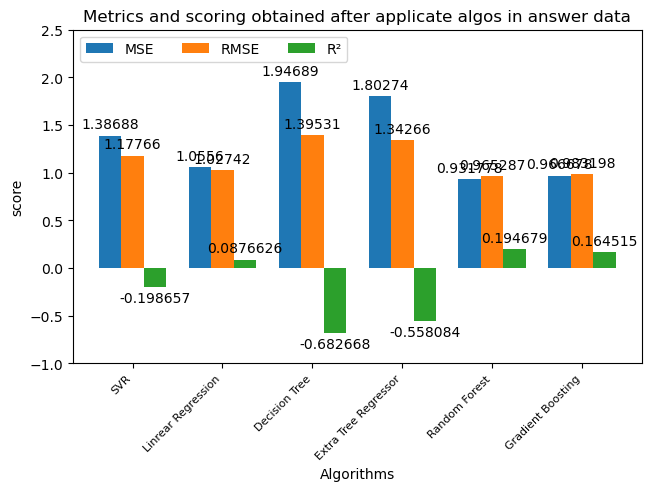

In [43]:
import matplotlib.pyplot as plt

algos = ("SVR", "Linrear Regression", "Decision Tree","Extra Tree Regressor","Random Forest","Gradient Boosting")
metrics = {
    'MSE': (mse_svm, mse_LinR, mse_DT,mse_XDT,mse_RF,mse_GB),
    'RMSE': (rmse_svm, rmse_LinR, rmse_DT,rmse_XDT,rmse_RF,rmse_GB),
    'R²': (r2_svm, r2_LinR, r2_DT,r2_XDT,r2_RF,r2_GB),
}

x = np.arange(len(algos))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Algorithms')
ax.set_ylabel('score')
ax.set_title('Metrics and scoring obtained after applicate algos in answer data')
#ax.set_xticks(x + width, algos,fontsize=7)
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(algos, rotation=45, ha='right', fontsize=8)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-1, 2.5)

plt.show()

<b> #Based on the plot ,the best algorithme is the one who have the minimal values of MSE/RMSE and the highest value of R², so the nice one that release this condition is the Random forest algorithme.

#### #Interpretation:

After analyzing the results from the metrics plot, we arrive at the following conclusions:

- **Traditional Machine Learning Algorithms**: These algorithms perform poorly in NLP tasks, as evidenced by their high MSE and RMSE values, and R² values close to 0.

- **Ensemble Learning Algorithms**: The performance varies among these algorithms. Decision Tree and Extra Tree Regressor show the highest MSE and RMSE values, indicating poor performance. In contrast, Random Forest and Gradient Boosting exhibit the lowest MSE and RMSE values, indicating better performance. When focusing on the R² score, Decision Trees deliver the best results among all algorithms, while Random Forest and Gradient Boosting also provide good R² values compared to other algorithms.

- **Overall Assessment**: Traditional machine learning algorithms can be classified as weak for NLP tasks due to their poor performance metrics. Ensemble learning algorithms perform better, though not exceptionally well, in these tasks. This outcome might be linked to the nature of the dataset or the specific type of task.

## Part 2: Language Modeling / Classification: 

Text Classification assigns predefined categories to text. This can include tasks like spam detection, sentiment analysis, and topic categorization. Classification models analyze the text and determine its characteristics or the author's intent. Traditional machine learning algorithms like logistic regression and support vector machines (SVMs), as well as modern deep learning approaches using convolutional neural networks (CNNs) and transformers, are commonly used for these tasks.

<h3>#Used DATA:

Each row in the training dataset `twitter_training.csv` represents a tweet. The data types of the features are as follows:

- **Tweet ID**: int
- **Entity**: string
- **Sentiment**: string (Label)
- **Tweet content**: string

The validation dataset `twitter_validation.csv` contains 998 rows (tweets) and 4 columns (features). The "Sentiment" column is the target label to predict.

**DATASET**: [Kaggle Dataset - Twitter Entity Sentiment Analysis](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import json
#Import cleaning tools
from Clean_Func import convert_to_bytes, bytes_to_json, clean_tweet_content

In [45]:
%%time
# Load and preprocess data
data__ = []
with open('twitter_training.csv', 'r', errors='ignore') as file:
    for line in file:
        json_data = convert_to_bytes(line)
        data__.append(json.dumps(json_data).encode('utf-8'))

js_data__ = [bytes_to_json(dt) for dt in data__]
df_senti = pd.DataFrame(js_data__)

for i in range(len(df_senti['tweet_content'])):
    df_senti['tweet_content'][i] = clean_tweet_content(df_senti['tweet_content'][i])

for i in range(len(df_senti['sentiment'])):
    if df_senti['sentiment'][i] == 'Positive':
        df_senti['sentiment'][i] = 0
    elif df_senti['sentiment'][i] == 'Neutral':
        df_senti['sentiment'][i] = 1
    elif df_senti['sentiment'][i] == 'Negative':
        df_senti['sentiment'][i] = 2
    elif df_senti['sentiment'][i] == 'Irrelevant':
        df_senti['sentiment'][i] = 3

CPU times: total: 1min 52s
Wall time: 2min 3s


In [46]:
# Drop rows with any empty cells
df_senti.dropna(inplace=True)
df_senti

,Tweet ID,Entity,sentiment,tweet_content
0,2401,Borderlands,0,getting on borderlands and i will murder you all
1,2401,Borderlands,0,i am coming to the borders and i will kill you a
2,2401,Borderlands,0,getting on borderlands and i will kill you a
3,2401,Borderlands,0,coming on borderlands and i will murder you a
4,2401,Borderlands,0,getting on borderlands and i will murder you me a
...,...,...,...,...
74677,9200,Nvidia,0,just realized that the windows partition of my...
74678,9200,Nvidia,0,just realized that my mac window partition is ...
74679,9200,Nvidia,0,just realized the windows partition of my mac ...
74680,9200,Nvidia,0,just realized between the windows partition of...


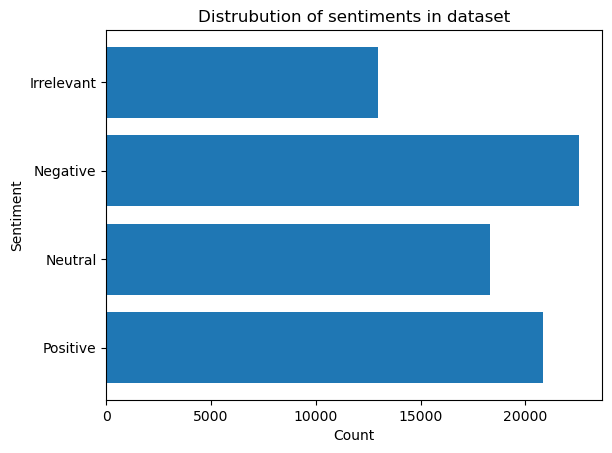

In [47]:
#Count the number of each sentiment:
pos=list(df_senti['sentiment']).count(0)
neut=list(df_senti['sentiment']).count(1)
neg=list(df_senti['sentiment']).count(2)
irre=list(df_senti['sentiment']).count(3)

Sent_x=['Positive','Neutral','Negative','Irrelevant']
Sent_y=[pos,neut,neg,irre]
plt.barh(Sent_x,Sent_y)
plt.ylabel('Sentiment')
plt.xlabel('Count')
plt.title('Distrubution of sentiments in dataset')
plt.show()

#### #NLP processing pipeline:

In [48]:
import nltk
from nltk import word_tokenize

In [49]:
lst_senti=[word_tokenize(df_senti['tweet_content'][i]) for i in range(len(df_senti))]
df_senti.insert(4,"tokenized_sentence",lst_senti)

In [50]:
df_senti

,Tweet ID,Entity,sentiment,tweet_content,tokenized_sentence
0,2401,Borderlands,0,getting on borderlands and i will murder you all,"[getting, on, borderlands, and, i, will, murde..."
1,2401,Borderlands,0,i am coming to the borders and i will kill you a,"[i, am, coming, to, the, borders, and, i, will..."
2,2401,Borderlands,0,getting on borderlands and i will kill you a,"[getting, on, borderlands, and, i, will, kill,..."
3,2401,Borderlands,0,coming on borderlands and i will murder you a,"[coming, on, borderlands, and, i, will, murder..."
4,2401,Borderlands,0,getting on borderlands and i will murder you me a,"[getting, on, borderlands, and, i, will, murde..."
...,...,...,...,...,...
74677,9200,Nvidia,0,just realized that the windows partition of my...,"[just, realized, that, the, windows, partition..."
74678,9200,Nvidia,0,just realized that my mac window partition is ...,"[just, realized, that, my, mac, window, partit..."
74679,9200,Nvidia,0,just realized the windows partition of my mac ...,"[just, realized, the, windows, partition, of, ..."
74680,9200,Nvidia,0,just realized between the windows partition of...,"[just, realized, between, the, windows, partit..."


In [51]:
from nltk.stem import WordNetLemmatizer

In [52]:
#LEMMATIZATION/
lemm_senti = WordNetLemmatizer()

In [53]:
lemmat_wrd_senti=[[lemm_senti.lemmatize(wrd.lower()) for wrd in token] for token in df_senti['tokenized_sentence']]
df_senti.insert(5,'lemmatized_words',lemmat_wrd_senti)

In [54]:
df_senti

,Tweet ID,Entity,sentiment,tweet_content,tokenized_sentence,lemmatized_words
0,2401,Borderlands,0,getting on borderlands and i will murder you all,"[getting, on, borderlands, and, i, will, murde...","[getting, on, borderland, and, i, will, murder..."
1,2401,Borderlands,0,i am coming to the borders and i will kill you a,"[i, am, coming, to, the, borders, and, i, will...","[i, am, coming, to, the, border, and, i, will,..."
2,2401,Borderlands,0,getting on borderlands and i will kill you a,"[getting, on, borderlands, and, i, will, kill,...","[getting, on, borderland, and, i, will, kill, ..."
3,2401,Borderlands,0,coming on borderlands and i will murder you a,"[coming, on, borderlands, and, i, will, murder...","[coming, on, borderland, and, i, will, murder,..."
4,2401,Borderlands,0,getting on borderlands and i will murder you me a,"[getting, on, borderlands, and, i, will, murde...","[getting, on, borderland, and, i, will, murder..."
...,...,...,...,...,...,...
74677,9200,Nvidia,0,just realized that the windows partition of my...,"[just, realized, that, the, windows, partition...","[just, realized, that, the, window, partition,..."
74678,9200,Nvidia,0,just realized that my mac window partition is ...,"[just, realized, that, my, mac, window, partit...","[just, realized, that, my, mac, window, partit..."
74679,9200,Nvidia,0,just realized the windows partition of my mac ...,"[just, realized, the, windows, partition, of, ...","[just, realized, the, window, partition, of, m..."
74680,9200,Nvidia,0,just realized between the windows partition of...,"[just, realized, between, the, windows, partit...","[just, realized, between, the, window, partiti..."


In [55]:
#STOPEWORDS/
from nltk.corpus import stopwords
stpwrds = set(stopwords.words('english'))
print(stpwrds)

{'other', "you'll", 'isn', 'whom', 'of', 'in', 'them', 'by', 'against', 'where', "isn't", 'ma', 'yourselves', 'at', 'hadn', 'doesn', 'just', "doesn't", 'until', 'has', 'what', 'had', 'be', 'doing', 'does', 're', 'shan', 'because', 'ourselves', 'd', 'can', 'on', 'are', 'below', "weren't", 'their', "she's", 'only', 'again', 'haven', 'these', 'few', 'but', 'a', 'was', 'over', 'will', "hadn't", 'all', 'to', 'for', 'up', 'have', 'an', 'hasn', 'once', 'yourself', 'your', 'shouldn', 'too', 'o', 'll', 'mustn', 'itself', 'than', 'herself', 'which', "that'll", 'or', 'under', 'did', "you'd", 'with', 't', 'couldn', 'now', 'he', 'why', 'and', "you've", 'my', 'so', 'same', "should've", 'between', 'about', 'those', 'both', "mightn't", 'm', 'wouldn', 'more', 'if', 'myself', 'here', 'wasn', 'its', 'that', 'i', "shouldn't", 'her', "needn't", 'from', 'is', 'out', 'we', 'then', 'down', 'should', 'me', 'needn', 'there', 'before', 'won', 'the', "shan't", "didn't", 'theirs', 'each', 'don', 's', 'our', "haven

In [56]:
rem_stpwrd_senti=[]
for tkn in df_senti['lemmatized_words']:
    rem__s=[]
    for wrd in tkn:
        if wrd not in stpwrds:
            rem__s.append(wrd)
    rem_stpwrd_senti.append(rem__s)
    
df_senti.insert(6,"removed_stpwrds",rem_stpwrd_senti)

In [57]:
df_senti

,Tweet ID,Entity,sentiment,tweet_content,tokenized_sentence,lemmatized_words,removed_stpwrds
0,2401,Borderlands,0,getting on borderlands and i will murder you all,"[getting, on, borderlands, and, i, will, murde...","[getting, on, borderland, and, i, will, murder...","[getting, borderland, murder]"
1,2401,Borderlands,0,i am coming to the borders and i will kill you a,"[i, am, coming, to, the, borders, and, i, will...","[i, am, coming, to, the, border, and, i, will,...","[coming, border, kill]"
2,2401,Borderlands,0,getting on borderlands and i will kill you a,"[getting, on, borderlands, and, i, will, kill,...","[getting, on, borderland, and, i, will, kill, ...","[getting, borderland, kill]"
3,2401,Borderlands,0,coming on borderlands and i will murder you a,"[coming, on, borderlands, and, i, will, murder...","[coming, on, borderland, and, i, will, murder,...","[coming, borderland, murder]"
4,2401,Borderlands,0,getting on borderlands and i will murder you me a,"[getting, on, borderlands, and, i, will, murde...","[getting, on, borderland, and, i, will, murder...","[getting, borderland, murder]"
...,...,...,...,...,...,...,...
74677,9200,Nvidia,0,just realized that the windows partition of my...,"[just, realized, that, the, windows, partition...","[just, realized, that, the, window, partition,...","[realized, window, partition, mac, like, year,..."
74678,9200,Nvidia,0,just realized that my mac window partition is ...,"[just, realized, that, my, mac, window, partit...","[just, realized, that, my, mac, window, partit...","[realized, mac, window, partition, year, behin..."
74679,9200,Nvidia,0,just realized the windows partition of my mac ...,"[just, realized, the, windows, partition, of, ...","[just, realized, the, window, partition, of, m...","[realized, window, partition, mac, year, behin..."
74680,9200,Nvidia,0,just realized between the windows partition of...,"[just, realized, between, the, windows, partit...","[just, realized, between, the, window, partiti...","[realized, window, partition, mac, like, year,..."


#### #Word2vect, Bag of words & TD-IDF:

In [58]:
import gensim
from gensim.models import Word2Vec

In [59]:
%%time
#setup the model's parametres 
model_1s = Word2Vec(sentences=list(df_senti["removed_stpwrds"]),vector_size=100,window=20,min_count=1, workers=6)
model_1s

CPU times: total: 1.61 s
Wall time: 1.71 s


In [60]:
%%time
#CBOW model using gensim
word_to_vectors_s=[vectorize_words(rmsw,model_1s) for rmsw in df_senti['removed_stpwrds']]
df_senti.insert(7,"words_to_vectors",word_to_vectors_s)

CPU times: total: 1.56 s
Wall time: 1.61 s


In [61]:
df_senti

,Tweet ID,Entity,sentiment,tweet_content,tokenized_sentence,lemmatized_words,removed_stpwrds,words_to_vectors
0,2401,Borderlands,0,getting on borderlands and i will murder you all,"[getting, on, borderlands, and, i, will, murde...","[getting, on, borderland, and, i, will, murder...","[getting, borderland, murder]","[0.42351925, 0.3056381, -0.72880673, 0.3812877..."
1,2401,Borderlands,0,i am coming to the borders and i will kill you a,"[i, am, coming, to, the, borders, and, i, will...","[i, am, coming, to, the, border, and, i, will,...","[coming, border, kill]","[0.22951324, 0.5187411, -0.40104958, 0.0957536..."
2,2401,Borderlands,0,getting on borderlands and i will kill you a,"[getting, on, borderlands, and, i, will, kill,...","[getting, on, borderland, and, i, will, kill, ...","[getting, borderland, kill]","[0.6952017, 0.5188528, -0.79685205, 0.46051297..."
3,2401,Borderlands,0,coming on borderlands and i will murder you a,"[coming, on, borderlands, and, i, will, murder...","[coming, on, borderland, and, i, will, murder,...","[coming, borderland, murder]","[0.71457577, 0.4086517, -0.52947694, 0.3551755..."
4,2401,Borderlands,0,getting on borderlands and i will murder you me a,"[getting, on, borderlands, and, i, will, murde...","[getting, on, borderland, and, i, will, murder...","[getting, borderland, murder]","[0.42351925, 0.3056381, -0.72880673, 0.3812877..."
...,...,...,...,...,...,...,...,...
74677,9200,Nvidia,0,just realized that the windows partition of my...,"[just, realized, that, the, windows, partition...","[just, realized, that, the, window, partition,...","[realized, window, partition, mac, like, year,...","[-0.45753682, 0.097305864, -0.46607238, 0.0998..."
74678,9200,Nvidia,0,just realized that my mac window partition is ...,"[just, realized, that, my, mac, window, partit...","[just, realized, that, my, mac, window, partit...","[realized, mac, window, partition, year, behin...","[-0.44627744, 0.019086082, -0.3721256, 0.06376..."
74679,9200,Nvidia,0,just realized the windows partition of my mac ...,"[just, realized, the, windows, partition, of, ...","[just, realized, the, window, partition, of, m...","[realized, window, partition, mac, year, behin...","[-0.46004865, 0.03933443, -0.38391602, 0.04021..."
74680,9200,Nvidia,0,just realized between the windows partition of...,"[just, realized, between, the, windows, partit...","[just, realized, between, the, window, partiti...","[realized, window, partition, mac, like, year,...","[-0.44402653, 0.3161216, -0.6288706, 0.3430476..."


In [62]:
%%time
#TF-IDF:
from sklearn.feature_extraction.text import TfidfVectorizer
docss=df_senti['tweet_content']
model_2s = TfidfVectorizer()
result_vects_s= model_2s.fit_transform(docss)
df_senti.insert(8,"TF-IDF_vects",list(result_vects_s.toarray()))

CPU times: total: 1.61 s
Wall time: 4.37 s


In [63]:
df_senti

,Tweet ID,Entity,sentiment,tweet_content,tokenized_sentence,lemmatized_words,removed_stpwrds,words_to_vectors,TF-IDF_vects
0,2401,Borderlands,0,getting on borderlands and i will murder you all,"[getting, on, borderlands, and, i, will, murde...","[getting, on, borderland, and, i, will, murder...","[getting, borderland, murder]","[0.42351925, 0.3056381, -0.72880673, 0.3812877...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2401,Borderlands,0,i am coming to the borders and i will kill you a,"[i, am, coming, to, the, borders, and, i, will...","[i, am, coming, to, the, border, and, i, will,...","[coming, border, kill]","[0.22951324, 0.5187411, -0.40104958, 0.0957536...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2401,Borderlands,0,getting on borderlands and i will kill you a,"[getting, on, borderlands, and, i, will, kill,...","[getting, on, borderland, and, i, will, kill, ...","[getting, borderland, kill]","[0.6952017, 0.5188528, -0.79685205, 0.46051297...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2401,Borderlands,0,coming on borderlands and i will murder you a,"[coming, on, borderlands, and, i, will, murder...","[coming, on, borderland, and, i, will, murder,...","[coming, borderland, murder]","[0.71457577, 0.4086517, -0.52947694, 0.3551755...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2401,Borderlands,0,getting on borderlands and i will murder you me a,"[getting, on, borderlands, and, i, will, murde...","[getting, on, borderland, and, i, will, murder...","[getting, borderland, murder]","[0.42351925, 0.3056381, -0.72880673, 0.3812877...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
74677,9200,Nvidia,0,just realized that the windows partition of my...,"[just, realized, that, the, windows, partition...","[just, realized, that, the, window, partition,...","[realized, window, partition, mac, like, year,...","[-0.45753682, 0.097305864, -0.46607238, 0.0998...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
74678,9200,Nvidia,0,just realized that my mac window partition is ...,"[just, realized, that, my, mac, window, partit...","[just, realized, that, my, mac, window, partit...","[realized, mac, window, partition, year, behin...","[-0.44627744, 0.019086082, -0.3721256, 0.06376...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
74679,9200,Nvidia,0,just realized the windows partition of my mac ...,"[just, realized, the, windows, partition, of, ...","[just, realized, the, window, partition, of, m...","[realized, window, partition, mac, year, behin...","[-0.46004865, 0.03933443, -0.38391602, 0.04021...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
74680,9200,Nvidia,0,just realized between the windows partition of...,"[just, realized, between, the, windows, partit...","[just, realized, between, the, window, partiti...","[realized, window, partition, mac, like, year,...","[-0.44402653, 0.3161216, -0.6288706, 0.3430476...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


#### #ML models:

In this part we will applicate the machine learning model in the cleaned data to predict the sentiment obtained in each tweet.(we using the Words_to_vectors in rest of this lab's part)

In [64]:
X_s=np.vstack(df_senti['words_to_vectors'].values)
y_s=df_senti['sentiment'].values
y_s = y_s.astype(int)

In [65]:
from sklearn.model_selection import train_test_split
Xs_train,Xs_test,ys_train,ys_test=train_test_split(X_s,y_s,random_state=42,test_size=0.25)

##### #Support Vector Machine (SVM-C), Naive bayes, logistic Regression & adaBoost:

In [66]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [67]:
# Initialize models
svc = SVC()
nb = MultinomialNB()
lr = LogisticRegression(C=1, solver='liblinear', penalty='l2', max_iter=1000)
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
xgb = GradientBoostingClassifier()

In [68]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("----------------------------------------------------\n")
    return [y_pred,accuracy,precision,recall,f1]

In [69]:
%%time
print("Support Vector Classifier (SVC):")
y_pred_svc,accuracy_svc,precision_svc,recall_svc,f1_svc=evaluate_model(svc, Xs_train, Xs_test, ys_train, ys_test)

Support Vector Classifier (SVC):
Model: SVC
Accuracy: 0.5310
Precision: 0.5383
Recall: 0.5310
F1 Score: 0.5022

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.64      0.57      5309
           1       0.53      0.45      0.48      4510
           2       0.55      0.72      0.62      5639
           3       0.59      0.13      0.21      3213

    accuracy                           0.53     18671
   macro avg       0.54      0.48      0.47     18671
weighted avg       0.54      0.53      0.50     18671

----------------------------------------------------

CPU times: total: 9min 25s
Wall time: 10min 37s


In [70]:
%%time
#Xs_ have a nrgative values:
"""print("Naive Bayes:")
y_pred_nb,accuracy_nb,precision_nb,recall_nb,f1_nb=evaluate_model(nb, Xs_train, Xs_test, ys_train, ys_test)"""

CPU times: total: 0 ns
Wall time: 0 ns


'print("Naive Bayes:")\ny_pred_nb,accuracy_nb,precision_nb,recall_nb,f1_nb=evaluate_model(nb, Xs_train, Xs_test, ys_train, ys_test)'

In [71]:
%%time
print("Logistic regression:")
y_pred_lr,accuracy_lr,precision_lr,recall_lr,f1_lr=evaluate_model(lr, Xs_train, Xs_test, ys_train, ys_test)

Logistic regression:
Model: LogisticRegression
Accuracy: 0.4999
Precision: 0.4966
Recall: 0.4999
F1 Score: 0.4722

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53      5309
           1       0.44      0.51      0.47      4510
           2       0.53      0.68      0.60      5639
           3       0.48      0.09      0.16      3213

    accuracy                           0.50     18671
   macro avg       0.49      0.46      0.44     18671
weighted avg       0.50      0.50      0.47     18671

----------------------------------------------------

CPU times: total: 35.6 s
Wall time: 39.8 s


In [72]:
%%time
print("AdaBoost:")
y_pred_ada,accuracy_ada,precision_ada,recall_ada,f1_ada=evaluate_model(ada, Xs_train, Xs_test, ys_train, ys_test)

AdaBoost:
Model: AdaBoostClassifier
Accuracy: 0.4715
Precision: 0.5180
Recall: 0.4715
F1 Score: 0.4348

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.56      0.51      5309
           1       0.41      0.45      0.43      4510
           2       0.51      0.65      0.57      5639
           3       0.76      0.04      0.08      3213

    accuracy                           0.47     18671
   macro avg       0.54      0.43      0.40     18671
weighted avg       0.52      0.47      0.43     18671

----------------------------------------------------

CPU times: total: 1min 22s
Wall time: 1min 31s


In [73]:
%%time
print("Extream Gradient Boost (XGBoost):")
y_pred_xgb,accuracy_xgb,precision_xgb,recall_xgb,f1_xgb=evaluate_model(xgb, Xs_train, Xs_test, ys_train, ys_test)

Extream Gradient Boost (XGBoost):
Model: GradientBoostingClassifier
Accuracy: 0.5208
Precision: 0.5108
Recall: 0.5208
F1 Score: 0.5013

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.62      0.55      5309
           1       0.52      0.45      0.48      4510
           2       0.56      0.69      0.61      5639
           3       0.44      0.17      0.25      3213

    accuracy                           0.52     18671
   macro avg       0.50      0.48      0.47     18671
weighted avg       0.51      0.52      0.50     18671

----------------------------------------------------

CPU times: total: 14min 4s
Wall time: 16min 5s


#### #Plot metrics:

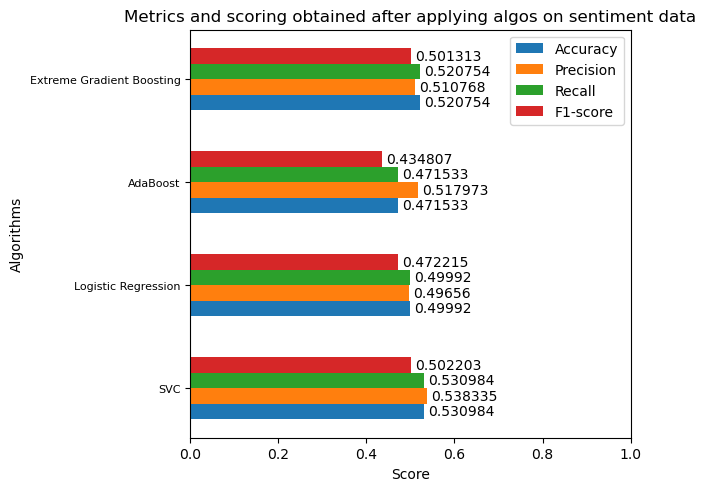

In [74]:
import matplotlib.pyplot as plt
import numpy as np

algos = ("SVC", "Logistic Regression", "AdaBoost", "Extreme Gradient Boosting")
metrics = {
    'Accuracy': (accuracy_svc,accuracy_lr,accuracy_ada,accuracy_xgb),
    'Precision': (precision_svc,precision_lr,precision_ada,precision_xgb),
    'Recall': (recall_svc,recall_lr,recall_ada,recall_xgb),
    'F1-score': (f1_svc,f1_lr,f1_ada,f1_xgb),
}

y = np.arange(len(algos))  # the label locations
height = 0.15  # the height of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metrics.items():
    offset = height * multiplier
    rects = ax.barh(y + offset, measurement, height, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title, and custom y-axis tick labels, etc.
ax.set_ylabel('Algorithms')
ax.set_xlabel('Score')
ax.set_title('Metrics and scoring obtained after applying algos on sentiment data')
ax.set_yticks(y + height * (len(metrics) - 1) / 2)
ax.set_yticklabels(algos, rotation=0, ha='right', fontsize=8)
ax.legend(loc='upper right', ncols=1)
ax.set_xlim(0, 1)

plt.show()


##### #NB:models need parameters-tuning 
**Parameter tuning is an essential step to improve the performance of machine learning models.**

<p>You can view our repository on GitHub for a full notebook demonstrating the use of Logistic Regression with PySpark to process the same data in streaming mode. Click <a href="https://github.com/IsmailDr13f/Sentiment-analysis--streaming-Twitter-data-Kafka-Spark-Python-mongodb/blob/main/Pipeline_modelLR.ipynb">here</a> to access it.</p>


#### #Conclusion:

In this lab, we aimed to familiarize ourselves with Natural Language Processing (NLP) language models using the Sklearn library. The lab consisted of two main parts: Language Modeling with Regression and Language Modeling with Classification.

In the first part, we performed the following tasks:
1. Established a preprocessing NLP pipeline, including tokenization, stemming, lemmatization, stop words removal, and discretization, on the collected dataset.
2. Encoded the data vectors using various techniques such as Word2Vec (CBOW) and TF-IDF.
3. Trained regression models including SVR, Linear Regression,Extra tree,random forest,gradient boosting and Decision Tree algorithms using Word2Vec embeddings.
4. Evaluated the regression models using standard metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R² score., and selected the best model based on the evaluation results.
5. Interpreted the obtained results to draw insights and conclusions about the regression models' performance.

In the second part, we conducted the following steps:
1. Established a preprocessing NLP pipeline similar to the first part but tailored for classification tasks.
2. Encoded the data vectors using Word2Vec (CBOW) and TF-IDF.
3. Trained classification models including SVM, Naive Bayes, Logistic Regression,XGBoost and AdaBoosting algorithms using Word2Vec embeddings.
4. Evaluated the classification models using standard metrics such as Accuracy, Loss, and F1 Score, and selected the best model based on the evaluation results.
5. Interpreted the obtained results to draw insights and conclusions about the classification models' performance.

Overall, this lab provided hands-on experience in preprocessing text data, encoding it into numerical representations using various techniques, training different types of models, evaluating their performance using standard metrics, and interpreting the results to make informed decisions about model selection and optimization strategies. In addition, it's worth mentioning that while traditional machine learning algorithms like SVM, Naive Bayes, and Logistic Regression have been widely used in NLP tasks, neural networks have emerged as a powerful alternative for modeling language. Neural networks, especially deep learning architectures like Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, and Transformer models, have shown remarkable performance in various NLP tasks such as text classification, sentiment analysis, machine translation, and language generation. 
Furthermore, ensemble learning techniques, which combine multiple models to improve predictive performance, have also gained popularity in NLP. Algorithms like AdaBoost, Gradient Boosting, and Random Forests have been successfully applied to language modeling tasks, often achieving superior results by leveraging the diversity of multiple models.

In summary, while traditional machine learning approaches have their merits, neural networks and ensemble learning techniques have demonstrated state-of-the-art performance in modeling language and are increasingly becoming the preferred choice for NLP tasks due to their ability to capture complex patterns in textual data and generalize well to diverse language domains.